### This Notebook is a Walkthrough of Lesson 2 Pages 3-6 in R

Logistic regression is a type of regression that works when you have a single categorical dependent variable. 

There are 5 assumptions of Logistic Regression

If your model meets all 5 assumptions, it will be as free of error as possible.

#### 5 Assumptions:

1)Meets minimum sample size of having at least one case per cell, with no more than 20% of cells having less than five cases.
(What is meant by cells? If you made a 2x2 chart of the actual and predicted outcomes, you should have at least 1 case in each.)

2)Linearity in the logit

3)Absence of multicollinearity

4)Absence of outliers

5)Independence of errors

#above from L2P3

### Load Libraries

In [14]:
library("caret")
library("magrittr")
library("dplyr")
library("tidyr")
library("lmtest")
library("popbio")
library("e1071")
#code below hides the pink warning messages that just don't look so nice:)
defaultW <- getOption("warn") 
options(warn = -1)

### Load in Data

In [15]:
Baseball = read.csv('../Data/baseball.csv')

In [16]:
head(Baseball)

,Game,Team,Opp,W.L,R,RA,D.N,Att,Team.1,HR.Count
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,1,ARI,SFG,W,6,5,D,49016,ARI,1
2,1,CHC,STL,L,3,4,N,47566,CHC,1
3,1,NYY,TBR,L,3,7,D,31042,NYY,0
4,1,SFG,ARI,L,5,6,D,49016,SF,2
5,1,STL,CHC,W,4,3,N,47566,STL,1
6,1,TBR,NYY,W,7,3,D,31042,TB,2


### Question Set up

Perform a regression where the predictor (IV) is the number of home runs hit by a team, and the response variable (DV) is whether the team wins or loses. This is a case of a quantitative predictor variable, and a categorical response variable. So are the home runs a team hits, going to be influencing whether they win?

## Data Wrangling**

### THIS IS SUPER IMPORTANT ***

The outcome variable (DV) MUST be recoded numerically 

Remember when you learned recoding? You will need to recode the wins and losses to 1s and 0s. The code below will do it for you:)

In [17]:
Baseball$WinsR <- NA
Baseball$WinsR[Baseball$W.L=='W'] <- 1
Baseball$WinsR[Baseball$W.L=='L'] <- 0
#to break this down, first a recoding column is created: WinsR
#this code follows the format of: 
#dataset_name$Column_Recoded[dataset_name$original_column=='value']<-0
#the $ dollar sign is necessary to separate the dataset name from the column

### Testing Assumptions

### Looking at Sample Size

### Run the Base Logistic Model
Create a model before you can verify it meets all assumptions

In [18]:
mylogit <- glm(WinsR ~ HR.Count, data=Baseball, family="binomial")
#here we are calling our model mylogit
#glm is the function
#WinsR is our DV recoded column from above
#HR.Count is our IV
#Baseball is our dataset
#family= "binomial" because we are doing Binomial Logistic Regression

### Predict Wins and Losses using the predict() function

In [19]:
probabilities <- predict(mylogit, type = "response")

Then convert your probabilities to a positive and negative prediction by having anything above .5 (half) be positive, and anything below .5 be negative. This will be done using the ifelse() function on the probabilities variable you just created, and it will be assigned to your baseball data set, as the column Predicted, so that you can later compare it with the recoded wins and losses column.(L2P4)

In [20]:
probabilities <- predict(mylogit, type = "response")
Baseball$Predicted <- ifelse(probabilities > .5, "pos", "neg")

### Recoding the Predicted Variable
Just like we recoded above, we need to recode the predicted variable.

In [21]:
Baseball$PredictedR <- NA
Baseball$PredictedR[Baseball$Predicted=='pos'] <- 1
Baseball$PredictedR[Baseball$Predicted=='neg'] <- 0

### Convert Variables to Factors

The next thing you need to do is to convert the WinsR and the PredictedR columns to factors. This is necessary because the next line of code you will run requires these variables to be factors. Simply specify the dataset and call the variable before the arrow, then use the function as.factor() and call the variable again.(L2P4)

In [22]:
Baseball$PredictedR <- as.factor(Baseball$PredictedR)
Baseball$WinsR <- as.factor(Baseball$WinsR)



### Create Confusion Matrix
Test for Sample Size:

In [23]:
conf_mat <- caret::confusionMatrix(Baseball$PredictedR, Baseball$WinsR)
conf_mat

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1917 1240
         1  513 1190
                                          
               Accuracy : 0.6393          
                 95% CI : (0.6256, 0.6528)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2786          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7889          
            Specificity : 0.4897          
         Pos Pred Value : 0.6072          
         Neg Pred Value : 0.6988          
             Prevalence : 0.5000          
         Detection Rate : 0.3944          
   Detection Prevalence : 0.6496          
      Balanced Accuracy : 0.6393          
                                          
       'Positive' Class : 0               
                        

Go ahead and look at the top left of the results.

Top left corner (Reference: 0, Prediction: 0): These are the cases that failed the condition and were predicted to fail the condition. In your case, a loss was predicted and a loss actually happened.
This is the number you accurately predicted as "did not happen."

Top right corner (Reference: 1, Prediction: 0): These are the cases that were predicted to fail the condition, but did not actually fail. In terms of the current dataset: a loss was predicted, but the team actually won.

Bottom left corner (Reference: 0, Prediction: 1): These are the cases where a success was predicted, but a failure actually happened. This means that the team was predicted to win, but they actually lost.

Bottom right corner (Reference: 1, Prediction: 1): These are the cases were a success was predicted and a success actually happened. So, the team was predicted to win and they actually won.
This is the number you accurately predicted as "did happen."
(L2P4)

All 4 cells are above 5 so the minimum sample size is met.

We also see the .639 accuracy rate means we are 64% accurate our predictions are correct.

### Logit Linearity

Now we have the model and predictions, we can calculate the logit and then graph it against the predicted values.

We want to assess the linearity of the logit with numeric variables, so using the library dplyr, and the select_if() function, we will select only numeric columns from the full dataset by specifying as the argument is.numeric.

In [24]:
#to plot the logit graphs to print, you need to run as.numeric 
#for the WinsR column 
Baseball$WinsR <- as.numeric(Baseball$WinsR)

In [25]:
Baseball1 <- Baseball %>% 
dplyr::select_if(is.numeric)

We will rename the column names to be fed into predictors using the colnames() function:

In [26]:
predictors <- colnames(Baseball1)

Lastly, create the logit, using tidyr's mutate() and gather() functions. The logit is calculated as the log of the probabilities divided by one minus the probabilities.

In [27]:
Baseball2 <- Baseball1 %>%
mutate(logit=log(probabilities/(1-probabilities))) %>%
gather(key= "predictors", value="predictor.value", -logit)

We will graph using ggplot!

`geom_smooth()` using formula 'y ~ x'



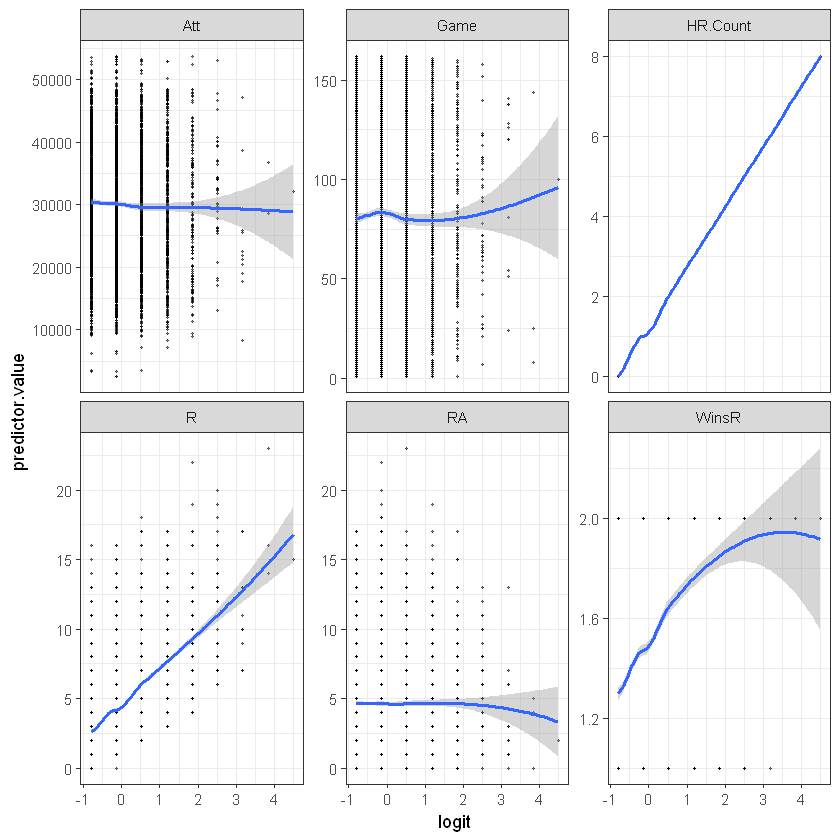

In [28]:
ggplot(Baseball2, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

This will automatically graph every numeric variable. The HRCount graph in the top right shows a lovely linear relationship so the assumption has been met! 

### Multicollinearity

Basically meaning the independent variables can't be too closely related to each other. However, since there is only one independent variable, this does not apply here.



### Independent Errors

Graphing the residuals over the index

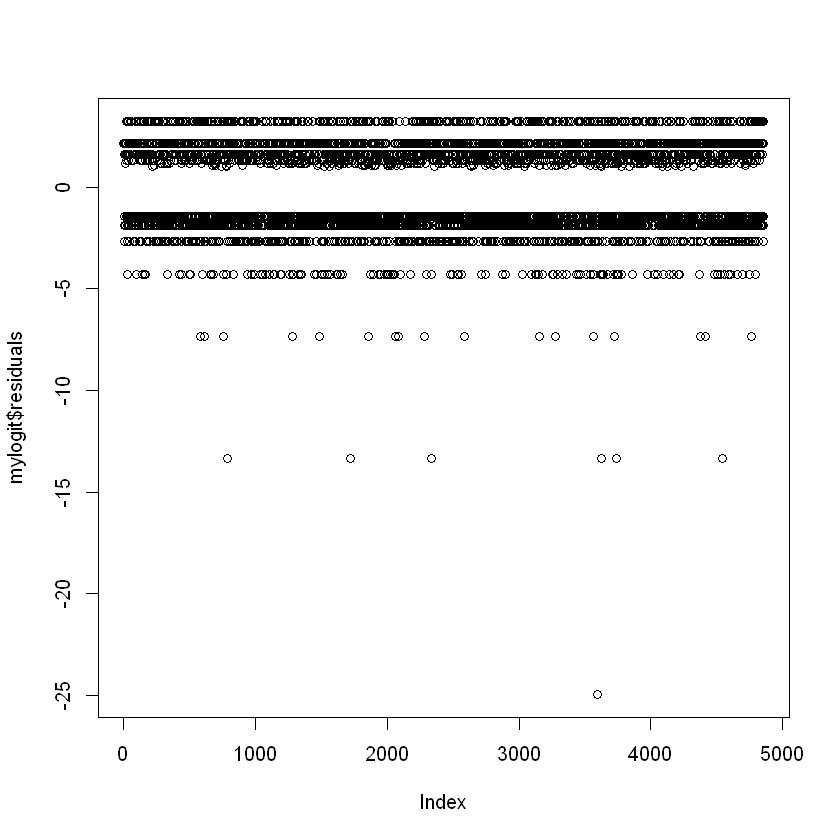

In [29]:
plot(mylogit$residuals)

We are looking for a pretty even distribution of points all the way across your x axis. We see that, so the assumption of independent errors is met.

### Durbin-Watson Test

Confirms if there is independence of errors using function dwtest() out of the lmtest library.

In [30]:
dwtest(mylogit, alternative="two.sided")


	Durbin-Watson test

data:  mylogit
DW = 2.0828, p-value = 0.003875
alternative hypothesis: true autocorrelation is not 0


Using the alternative="two.sided" argument means that we are testing both positive and negative autocorrelation of errors.

If this test is not statistically significant (> .05), then the condition is satisfied, and there are independent errors. However, if it is significant, look at the actual value of the Durbin-Watson test statistic. If it is under 1 or greater than 3, then the assumption of independent errors has been violated. Since the DW value is 2.08, it is in an ok range and have met the assumption of independent errors through testing as well as graphing!

### Screening for Outliers

In [31]:
infl <- influence.measures(mylogit)
summary(infl)

Potentially influential observations of
	 glm(formula = WinsR ~ HR.Count, family = "binomial", data = Baseball) :

     dfb.1_ dfb.HR.C dffit   cov.r   cook.d hat  
16   -0.01   0.01     0.02    1.00_*  0.00   0.00
233  -0.01   0.01     0.01    1.00_*  0.00   0.00
275  -0.01   0.01     0.02    1.00_*  0.00   0.00
285  -0.01   0.01     0.02    1.00_*  0.00   0.00
309  -0.01   0.01     0.02    1.00_*  0.00   0.00
320  -0.01   0.01     0.02    1.00_*  0.00   0.00
327  -0.01   0.01     0.02    1.00_*  0.00   0.00
334  -0.01   0.01     0.02    1.00_*  0.00   0.00
345  -0.01   0.01     0.02    1.00_*  0.00   0.00
437  -0.01   0.01     0.02    1.00_*  0.00   0.00
498  -0.01   0.01     0.02    1.00_*  0.00   0.00
501  -0.01   0.01     0.02    1.00_*  0.00   0.00
586  -0.01   0.01     0.02    1.00_*  0.00   0.00
671  -0.01   0.01     0.01    1.00_*  0.00   0.00
679  -0.01   0.01     0.02    1.00_*  0.00   0.00
684  -0.01   0.01     0.02    1.00_*  0.00   0.00
694  -0.01   0.01     0.01    1.00_

Remember that if dfb.1_ or dffit values are greater than 1, or if hat is greater than .3 or so, there is probably an outlier than should be examined and possibly removed.



### Running Logistic Regression and Interpreting the Output

Now proceed to actually calling your logistic regression model and interpreting the output!

In [32]:
summary(mylogit)


Call:
glm(formula = WinsR ~ HR.Count, family = "binomial", data = Baseball)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5366  -1.1171  -0.3553   1.2389   1.5338  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.80749    0.04658  -17.34   <2e-16 ***
HR.Count     0.66398    0.03044   21.81   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6737.4  on 4859  degrees of freedom
Residual deviance: 6161.4  on 4858  degrees of freedom
AIC: 6165.4

Number of Fisher Scoring iterations: 4


First check the independent variable, the number of home runs, if it was a significant predictor of the number of wins and losses a team had. Looking in the Coefficients table under HR.Count, we see that the p value is significant at p < .001! This means that the number of home runs is a significant predictor of the number of wins and losses a team had. The z value given next to p is the Wald Statistic, and we can think of it similarly to the t tests we had for individual predictors in linear regression - it's just that Wald works for categorical variables and t tests don't.

In the same line, the estimate tells how much the independent variable influences the dependent. So, for every one unit increase in home runs, the log odds of winning a game (versus losing) are increased by .66.


### Graphing the Logistic Model

In [33]:
str(Baseball)
#love this code, shows the variables status of whether it is factor, numeric, etc.

'data.frame':	4860 obs. of  13 variables:
 $ Game      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Team      : chr  "ARI" "CHC" "NYY" "SFG" ...
 $ Opp       : chr  "SFG" "STL" "TBR" "ARI" ...
 $ W.L       : chr  "W" "L" "L" "L" ...
 $ R         : int  6 3 3 5 4 7 0 3 5 3 ...
 $ RA        : int  5 4 7 6 3 3 6 2 3 4 ...
 $ D.N       : chr  "D" "N" "D" "D" ...
 $ Att       : int  49016 47566 31042 49016 47566 31042 44384 45667 36594 43804 ...
 $ Team.1    : chr  "ARI" "CHC" "NYY" "SF" ...
 $ HR.Count  : int  1 1 0 2 1 2 0 1 1 1 ...
 $ WinsR     : num  2 1 1 1 2 2 1 2 2 1 ...
 $ Predicted : chr  "neg" "neg" "neg" "pos" ...
 $ PredictedR: Factor w/ 2 levels "0","1": 1 1 1 2 1 2 1 1 1 1 ...


In [34]:
Baseball$HR.Count <- as.factor(Baseball$HR.Count)
Baseball$WinsR <- as.numeric(Baseball$WinsR)

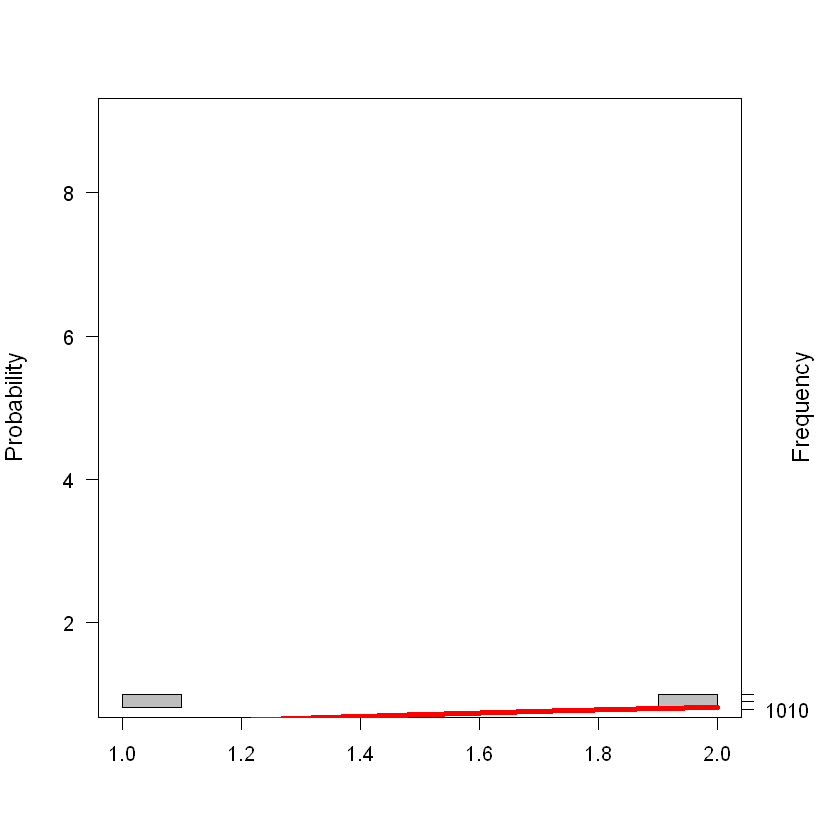

In [35]:
logi.hist.plot(Baseball$WinsR,Baseball$HR.Count, boxp=FALSE, type="hist", col="gray")

In [36]:
#the graph above looks silly because all the results are near the bottom because the values of x are of smaller range on the y axis :)
#still working on adjusting the y axis values to make this look a little nicer:)
#hope you enjoyed this notebook and found it helpful! The verbage of explanations are mostly from the lesson 2 page 3-5, <3 Mia